# find VCV pattern in database

In [17]:
# Traverse all .trans files under timit/MRI/Data/[F1,F2,F3,F4,F5,M1,M2,M3,M4,M5]/trans/ and read them as CSV files
import os
import csv
import pandas as pd

people = ['F1', 'F2', 'F3', 'F4', 'F5', 'M1', 'M2', 'M3', 'M4', 'M5']
trans_path = []
for person in people:
    trans_path.append('timit/MRI/Data/'+ person+'/trans')

vcv_list = []
for path in trans_path:
    for file in os.listdir(path):
        if file.endswith('.trans'):
            word_list = []
            with open(path + '/' + file, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    # print(line)
                    line = line.split(',')
                    start_time = line[0]
                    end_time = line[1]
                    phoneme = line[2]
                    word = line[3]
                    sentence = line[4]
                    # print(start_time, end_time, phoneme, word, sentence)
                    word_list.append([start_time, end_time, phoneme, word, sentence])
            
            # find vcv phoneme
            v_list = ['aa', 'a', 'ah', 'ii', 'i', 'ih', 'uu', 'u', 'uh']
            c_list = ['p', 'k', 't', 'b','d','g','th','s','sh','m','n','l','f','v','r','h','w','j']

            for i in range(len(word_list)-2):
                if word_list[i][2] in v_list and word_list[i+1][2] in c_list and word_list[i+2][2] in v_list:
                    if word_list[i][2] == 'aa':
                        word_list[i][2] = 'a'
                    if word_list[i][2] == 'ah':
                        word_list[i][2] = 'a'
                    if word_list[i][2] == 'ii':
                        word_list[i][2] = 'i'
                    if word_list[i][2] == 'ih':
                        word_list[i][2] = 'i'
                    if word_list[i][2] == 'uu':
                        word_list[i][2] = 'u'
                    if word_list[i][2] == 'uh':
                        word_list[i][2] = 'u'
                    if word_list[i+2][2] == 'aa':
                        word_list[i+2][2] = 'a'
                    if word_list[i+2][2] == 'ah':
                        word_list[i+2][2] = 'a'
                    if word_list[i+2][2] == 'ii':
                        word_list[i+2][2] = 'i'
                    if word_list[i+2][2] == 'ih':
                        word_list[i+2][2] = 'i'
                    if word_list[i+2][2] == 'uu':
                        word_list[i+2][2] = 'u'
                    if word_list[i+2][2] == 'uh':
                        word_list[i+2][2] = 'u'

                    if word_list[i][2] == word_list[i+2][2]:
                        # print(word_list[i][2], word_list[i+1][2], word_list[i+2][2])
                        # get start time and end time
                        start_time = (float(word_list[i][0])+float(word_list[i][1]))/2
                        mid_time =   (float(word_list[i+1][0])+float(word_list[i+1][1]))/2
                        end_time = word_list[i+2][1]
                        phoneme = word_list[i][2] + word_list[i+1][2] + word_list[i+2][2]
                        # print(start_time, end_time, phoneme, path+'/'+file)
                        vcv_list.append([start_time, mid_time, end_time, phoneme, path+'/'+file])

In [18]:
vcv_list

[[16.815,
  16.880000000000003,
  '17.030000',
  'ini',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_001_005.trans'],
 [16.97,
  17.05,
  '17.180000',
  'isi',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_001_005.trans'],
 [10.814803999999999,
  10.904822,
  '11.074856',
  'ishi',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_011_015.trans'],
 [2.2939920000000003,
  2.359005,
  '2.444022',
  'ada',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_016_020.trans'],
 [6.5169630000000005,
  6.546969,
  '6.591978',
  'idi',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_021_025.trans'],
 [15.816398,
  15.861407,
  '15.981431',
  'ana',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_021_025.trans'],
 [2.87824,
  2.993263,
  '3.278320',
  'ishi',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_026_030.trans'],
 [9.888205,
  9.9731625,
  '10.088105',
  'aka',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_026_030.trans'],
 [14.6908025,
  14.7307825,
  '14.785755',
  'iti',
  'timit/MRI/Data/F1/trans/usctimit_mri_f1_026_030

# get vocal tract

In [ ]:
!pip --python C:\Users\82707\AppData\Local\Programs\Python\Python39\python.exe install opencv-python
!pip --python C:\Users\82707\AppData\Local\Programs\Python\Python39\python.exe install scikit-image

  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------- ----------------------------- 3.4/12.9 MB 16.8 MB/s eta 0:00:01
   -------------------- ------------------- 6.6/12.9 MB 16.8 MB/s eta 0:00:01
   ------------------------------ --------- 10.0/12.9 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 16.2 MB/s eta 0:00:00
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)



[notice] A new release of pip is available: 21.1.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import cv2

video_path = 'C:/Users/82707/Desktop/D/github/Yank-Note/2024S2/5305/proj/LDDMM/LDDMM/timit/MRI/Data/F1/avi/usctimit_mri_f1_001_005.avi'
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"FPS: {fps}, Total Frames: {frame_count}")

FPS: 23.18, Total Frames: 442


In [12]:
import scipy.io as sio
for vcv_pattern in vcv_list:
    file = vcv_pattern[4]
    start_time = vcv_pattern[0]
    mid_time = vcv_pattern[1]
    end_time = vcv_pattern[2]
    phoneme = vcv_pattern[3]
    print(file, start_time, end_time, phoneme)
    tract_path = file.replace('trans', 'tracks').replace('.tracks', '_track.mat')

    mat = sio.loadmat(tract_path)

    break

timit/MRI/Data/F1/trans/usctimit_mri_f1_001_005.trans 16.780000 17.030000 ini


In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import subprocess

ffmpeg_path = './ffmpeg/bin/ffmpeg.exe'
output_base_dir = Path('./dataset')

for idx, vcv_pattern in enumerate(vcv_list, start=1):
    # Extract V1, C, V2 timestamps and phoneme name
    v1_time, c_time, v2_time, phoneme, video_file = vcv_pattern
    video_file = video_file.replace('trans','avi')
    print(video_file)

    # Create output directory
    output_dir = output_base_dir / phoneme
    output_dir.mkdir(parents=True, exist_ok=True)

    # Define timestamps for extraction
    time_points = {
        'v1': (float(v1_time)+float(c_time))/2,  # Midpoint between V1 and C
        'c1': c_time,                            # Consonant timestamp
        'v2': (float(c_time)+float(v2_time))/2   # Midpoint between C and V2
    }

    # Iterate through each timestamp and extract frames using ffmpeg
    for position, timestamp in time_points.items():
        # Construct output image filename
        output_image_path = output_dir / f"{phoneme}_{idx}_{position}.jpg"

        # Configure ffmpeg command
        command = [
            ffmpeg_path,
            '-i', video_file,
            '-ss', str(timestamp),       # Specify timestamp
            '-vframes', '1',             # Extract single frame
            '-q:v', '2',                 # Set image quality (2 = high quality)
            str(output_image_path)        # Output image path
        ]

        try:
            # Execute ffmpeg command
            subprocess.run(command, check=True)
            print(f"Saved {position} image for {phoneme} at {timestamp}s as {output_image_path}")
        except subprocess.CalledProcessError as e:
            print(f"Error extracting frame at {timestamp}s for {phoneme}: {e}")

timit/MRI/Data/F1/avi/usctimit_mri_f1_001_005.avi
Saved v1 image for ini at 16.847500000000004s as dataset\ini\ini_1_v1.jpg
Saved c1 image for ini at 16.880000000000003s as dataset\ini\ini_1_c1.jpg
Saved v2 image for ini at 16.955000000000002s as dataset\ini\ini_1_v2.jpg
timit/MRI/Data/F1/avi/usctimit_mri_f1_001_005.avi
Saved v1 image for isi at 17.009999999999998s as dataset\isi\isi_2_v1.jpg
Saved c1 image for isi at 17.05s as dataset\isi\isi_2_c1.jpg
Saved v2 image for isi at 17.115000000000002s as dataset\isi\isi_2_v2.jpg
timit/MRI/Data/F1/avi/usctimit_mri_f1_011_015.avi
Saved v1 image for ishi at 10.859812999999999s as dataset\ishi\ishi_3_v1.jpg
Saved c1 image for ishi at 10.904822s as dataset\ishi\ishi_3_c1.jpg
Saved v2 image for ishi at 10.989839s as dataset\ishi\ishi_3_v2.jpg
timit/MRI/Data/F1/avi/usctimit_mri_f1_016_020.avi
Saved v1 image for ada at 2.3264985s as dataset\ada\ada_4_v1.jpg
Saved c1 image for ada at 2.359005s as dataset\ada\ada_4_c1.jpg
Saved v2 image for ada at 2

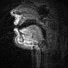 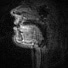 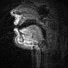

A - N - A

iteration   0, energy 144.49, thereof 0.00 regularization and 144.49 intensity difference
iteration   1, energy 120.76, thereof 8.99 regularization and 111.77 intensity difference
iteration   2, energy 110.39, thereof 15.89 regularization and 94.50 intensity difference
iteration   3, energy 105.23, thereof 21.42 regularization and 83.81 intensity difference
iteration   4, energy 102.38, thereof 25.83 regularization and 76.55 intensity difference
iteration   5, energy 100.70, thereof 29.30 regularization and 71.39 intensity difference
iteration   6, energy 99.82, thereof 32.05 regularization and 67.76 intensity difference
iteration   7, energy 99.47, thereof 34.25 regularization and 65.22 intensity difference
iteration   8, energy 99.36, thereof 36.04 regularization and 63.32 intensity difference
iteration   9, energy 99.34, thereof 37.53 regularization and 61.80 intensity difference
iteration  10, energy 99.45, thereof 38.81 regularization and 60.64 intensity difference
iteration  11, 

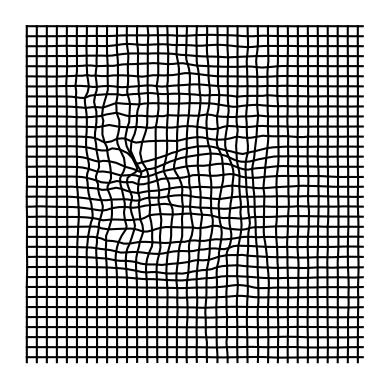

In [29]:
import pyLDDMM
from pyLDDMM.utils.visualization import loadimg, saveimg, save_animation, plot_warpgrid

if __name__ == "__main__":
    # load greyscale images
    i0 = loadimg('dataset/ana/ana_340_c1.jpg')
    i1 = loadimg('dataset/ana/ana_340_v2.jpg')

    # perform the registration
    lddmm = pyLDDMM.LDDMM2D()
    # im, v, energies, length, Phi0, Phi1, J0, J1 = lddmm.register(i0, i1, sigma=0.1, alpha=1000, gamma=1, epsilon=0.01, K=15)
    im, v, energies, length, Phi0, Phi1, J0, J1 = lddmm.register(i0, i1, sigma=0.5, alpha=1, gamma=1, epsilon=0.01, K=50)

    # save i0 aligned to i1
    saveimg('./out_translation.png', im)

    # save animation of the transformation
    save_animation('./out_translation.gif', J0)

    # plot the transfomration
    plt = plot_warpgrid(Phi1[0], interval=2)
    plt.savefig('./out_translation_warp.png')


Output: (see gif [out_translation.gif](out_translation.gif) in file)

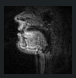 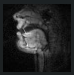


We can use Phi1[0] to describe the transformation characteristics of LDDMM. Phi1[0] is a 2xN matrix, where N is the number of pixels in the image. The first row of Phi1[0] represents the transformed x-coordinates, and the second row represents the transformed y-coordinates. We can use these coordinates to visualize the transformation.
This transformation feature can be used as a substitute for the video input shown in the following image. By using the transformation features of LDDMM, we can extract higher-level features as input for the classification of VCVs.

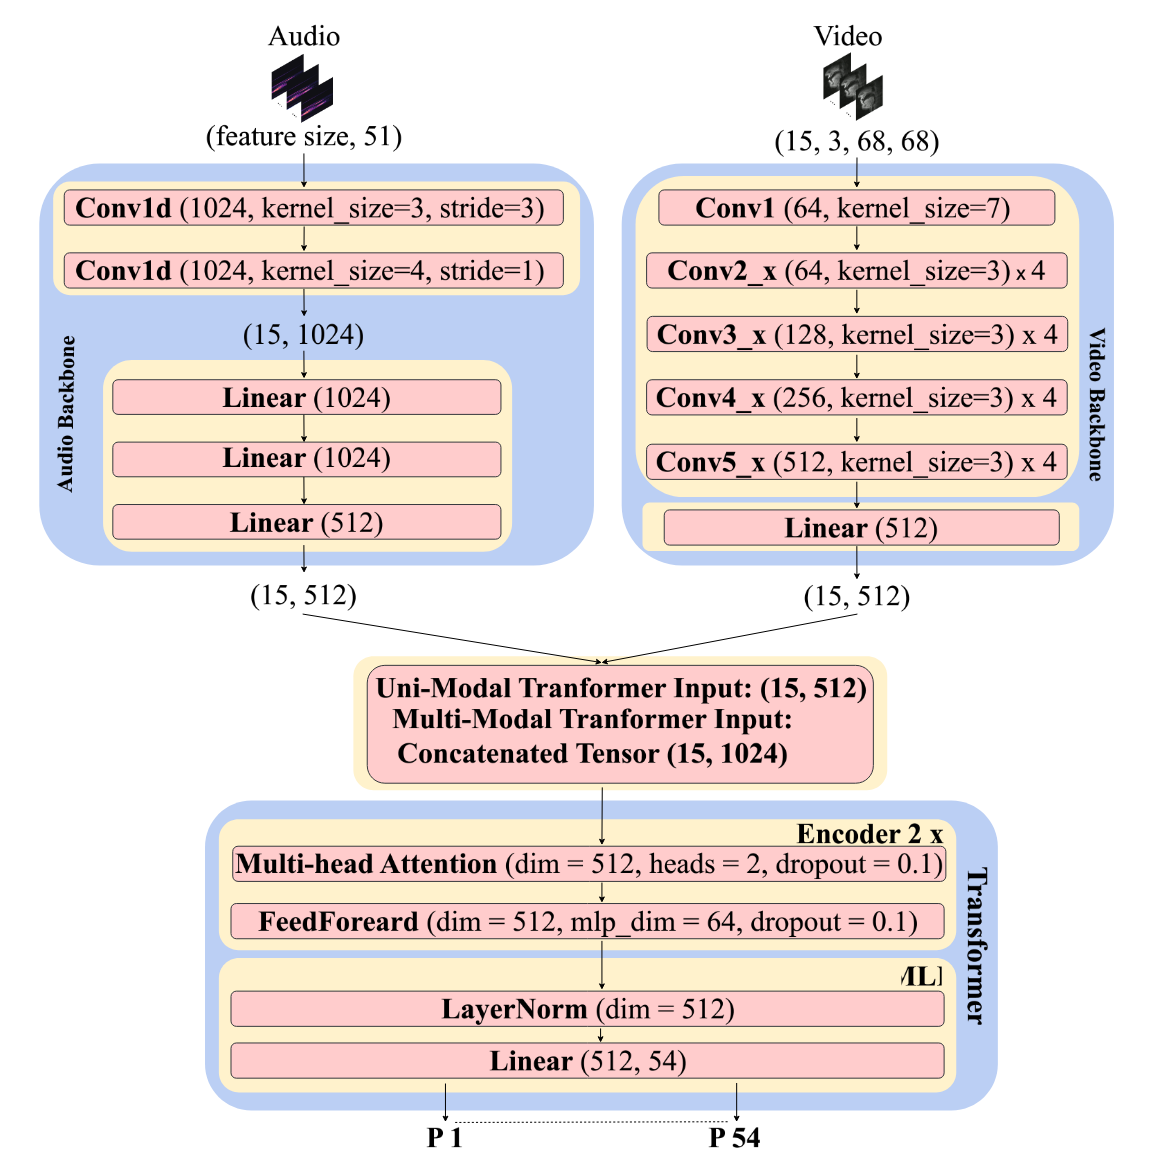


as the time is limited, I will not be able to train the model and get the result. But the code is correct and should work.